# 1 Introduction

```
=================================================
Milestone 1

Nama  : Nugroho Damar Wicaksono
Batch : FTDS-029

Program ini dibuat untuk mencari dan memecahkan masalah real case dimulai dari pembuatan 
problem statement, pengambilan data, cleaning data, analisis data serta pembuatan kesimpulan 
yang menyelesaikan masalah.
=================================================

link tableu : https://public.tableau.com/views/P0M1_Nugroho_wicaksono/Dashboard1?:language=en-US&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link

```

# 2. Problem Statement and Dataset Description

topik permasalahan

topik dari dataset yang saya ambil membahas tentang penurunan penjualan dari restaurant X


Problem Staement 

Restoran X mengalami penurunan kinerja penjualan yang ditandai dengan menurunnya jumlah transaksi dan frekuensi pembelian ulang dari pelanggan. Untuk mengatasi hal ini, diperlukan pendekatan berbasis data guna mengidentifikasi item menu yang diminati, waktu penjualan tertinggi, serta perilaku pelanggan. Dengan analisis tersebut, restoran dapat merancang strategi promosi yang lebih personal dan tepat sasaran untuk meningkatkan pengalaman pelanggan, mendorong loyalitas, serta meningkatkan jumlah transaksi hingga 15% dalam kurun waktu 90 hari.

Latar Belakang

Restoran X telah menghadapi penurunan pendapatan yang konsisten, yang menandakan penurunan kinerja penjualan secara keseluruhan. Meskipun restoran menawarkan berbagai macam item menu, data menunjukkan bahwa lalu lintas pelanggan dan pembelian berulang menurun. Untuk mengatasi hal ini, bisnis berencana untuk memanfaatkan data transaksional yang tersedia - yang mencakup atribut utama seperti detail pesanan, jenis barang, harga, jumlah yang terjual, nilai transaksi, waktu penjualan, dan staf yang terlibat - untuk mendorong retensi pelanggan, meningkatkan frekuensi pembelian, dan meningkatkan keberlanjutan bisnis secara keseluruhan.


Penjabaran Masalah

1.	Item menu apa saja yang termasuk paling laris dan paling tidak diminati berdasarkan total jumlah penjualan dan nilai transaksi?
2.	Pada jam dan hari apa saja terjadi puncak transaksi penjualan?
3.	Bagaimana tren jumlah transaksi dan total pendapatan dalam 6 bulan terakhir?
4.	apakah ada perbedaan signifikan dari  jenis transaksi terhadap jumlah penjualan?
5.	Apa kontribusi masing-masing jenis item terhadap total pendapatan restoran?
6.	Apakah terdapat gender dengan staf tertentu yang secara konsisten menangani transaksi dengan nilai penjualan tertinggi?

Data Understanding

Dataset Description:
Dataset ini berasal dari transaksi restaurant X. sebanyak 1000 transaksi ada didalam dataset

Dataset context:

Dataset ini dirancang untuk menganalisis tren penjualan dari waktu ke waktu, memahami preferensi pelanggan terhadap berbagai item, mengevaluasi pengaruh metode pembayaran terhadap pendapatan, menyelidiki kinerja anggota staf berdasarkan gender, serta mengeksplorasi popularitas barang pada berbagai momen sepanjang hari

# 3. Data Loading

In [1]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('P0M1_Nugroho_wicaksono_dataset.csv')
df.head(10)

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale
0,1,07-03-2022,Aalopuri,Fastfood,20,13,260,NaN,Mr.,Night
1,2,8/23/2022,Vadapav,Fastfood,20,15,300,Cash,Mr.,Afternoon
2,3,11/20/2022,Vadapav,Fastfood,20,1,20,Cash,Mr.,Afternoon
3,4,02-03-2023,Sugarcane juice,Beverages,25,6,150,Online,Mr.,Night
4,5,10-02-2022,Sugarcane juice,Beverages,25,8,200,Online,Mr.,Evening
5,6,11/14/2022,Vadapav,Fastfood,20,10,200,Cash,Mr.,Evening
6,7,05-03-2022,Sugarcane juice,Beverages,25,9,225,Cash,Mr.,Evening
7,8,12/22/2022,Panipuri,Fastfood,20,14,280,Online,Mr.,Night
8,9,06-10-2022,Panipuri,Fastfood,20,1,20,Cash,Mrs.,Morning
9,10,9/16/2022,Panipuri,Fastfood,20,5,100,Online,Mr.,Afternoon


```
loading csv menjadi dataframe df untuk memulai analisa 
```

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            1000 non-null   int64 
 1   date                1000 non-null   object
 2   item_name           1000 non-null   object
 3   item_type           1000 non-null   object
 4   item_price          1000 non-null   int64 
 5   quantity            1000 non-null   int64 
 6   transaction_amount  1000 non-null   int64 
 7   transaction_type    893 non-null    object
 8   received_by         1000 non-null   object
 9   time_of_sale        1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.3+ KB


```
df.info() untuk melihat nama column, jumlah isi, serta data type dari column
berguna untuk menentuk posisi untuk di clenaing

```

In [3]:
df.columns

Index(['order_id', 'date', 'item_name', 'item_type', 'item_price', 'quantity',
       'transaction_amount', 'transaction_type', 'received_by',
       'time_of_sale'],
      dtype='object')

```
.columns untuk melihat nama dari column di dataframe
```

In [4]:
df.nunique()

order_id              1000
date                   348
item_name                7
item_type                2
item_price               5
quantity                15
transaction_amount      48
transaction_type         2
received_by              2
time_of_sale             5
dtype: int64

```
melihat jumlah dari isi uniq dari setiap column pada dataframe
```

# 4. Data Cleaning

In [5]:
df.isna().sum()

order_id                0
date                    0
item_name               0
item_type               0
item_price              0
quantity                0
transaction_amount      0
transaction_type      107
received_by             0
time_of_sale            0
dtype: int64

```
melihat seberapa banyak  data null dari kolom
```

In [6]:
df['transaction_type'] = df['transaction_type'].fillna('other')

```
karena data null terdapat dalam kolom transaction_type, dan instruksi dari dataset untuk mengganti nan value menjadi 'other'
maka isi kolom tersebut menjadi 'other' 
```

In [7]:
df['transaction_type'].unique()

array(['other', 'Cash', 'Online'], dtype=object)

```
cek apakah masih ada data dalam column transaction_type null atau sudah menjadi 'other'
```


In [8]:
df.isna().sum()

order_id              0
date                  0
item_name             0
item_type             0
item_price            0
quantity              0
transaction_amount    0
transaction_type      0
received_by           0
time_of_sale          0
dtype: int64

```
cek ulang apakah masiha ada data null dalam setiap column pada dataframe
```

In [9]:
df['date'] = pd.to_datetime(df['date'], format='mixed', dayfirst=True, errors='coerce')

df['date']

0     2022-03-07
1     2022-08-23
2     2022-11-20
3     2023-03-02
4     2022-02-10
         ...    
995   2023-03-19
996   2022-09-20
997   2023-01-26
998   2022-08-27
999   2022-05-29
Name: date, Length: 1000, dtype: datetime64[ns]

```
ubah date dari string type menjadi datetime 
```

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order_id            1000 non-null   int64         
 1   date                1000 non-null   datetime64[ns]
 2   item_name           1000 non-null   object        
 3   item_type           1000 non-null   object        
 4   item_price          1000 non-null   int64         
 5   quantity            1000 non-null   int64         
 6   transaction_amount  1000 non-null   int64         
 7   transaction_type    1000 non-null   object        
 8   received_by         1000 non-null   object        
 9   time_of_sale        1000 non-null   object        
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 78.3+ KB


```
cek apakah ada tipe data yang tidak sesuai dari column di dataframe
```

In [11]:
df.duplicated().sum()

np.int64(0)

```
cek apakah ada baris data yang duplikat, lalu jumlahkan jika ada
```

# 5. Exploration and Analysis

Penjabaran Masalah

1.	Item menu apa saja yang termasuk paling laris dan paling tidak diminati berdasarkan total jumlah penjualan dan nilai transaksi? Visualization
2.	Pada jam dan hari apa saja terjadi puncak transaksi penjualan? Visualization
3.	Bagaimana tren jumlah transaksi dan total pendapatan dalam 6 bulan terakhir? Visualization 
4.	apakah ada perbedaan signifikan dari jenis transaksi terhadap jumlah penjualan? Inferensial   Statistics
5.	Apa kontribusi masing-masing jenis item terhadap total pendapatan restoran? Visualisasi
6.	Apakah terdapat staf dengan gender tertentu yang secara konsisten menangani transaksi dengan nilai penjualan tertinggi?  Descriptive Statistik

### 1

In [12]:
Masalah_satu = df.groupby('item_name')[['quantity', 'transaction_amount']].sum().reset_index()
Masalah_satu.columns = ['item_name', 'total_quantity_sold', 'total_transaction_amount']

```
buat dataframe baru untuk mengambil 'quantity', 'transaction_amount' dan sum masing masing kolom tersebut.
lalu group by item_name

namai masing masing kolom dengan nama 'item_name', 'total_quantity_sold', 'total_transaction_amount'
```

In [13]:
# Hitung median untuk mencari nilai item terlaris berdasarkan total quantity sold
Batas_quantity = Masalah_satu['total_quantity_sold'].median()

print(f"item paling tidak diminati < {Batas_quantity} sold > item diminati")

item paling tidak diminati < 1150.0 sold > item diminati


In [14]:
# Hitung median untuk mencari nilai item terlaris berdasarkan total transaction ammount
Batas_ammount = Masalah_satu['total_transaction_amount'].median()

print(f"item paling tidak diminati < {Batas_ammount} > item diminati")

item paling tidak diminati < 31950.0 > item diminati


C:\Users\damar\AppData\Local\Temp\ipykernel_11600\1388675308.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=laris.sort_values('total_quantity_sold', ascending=False),


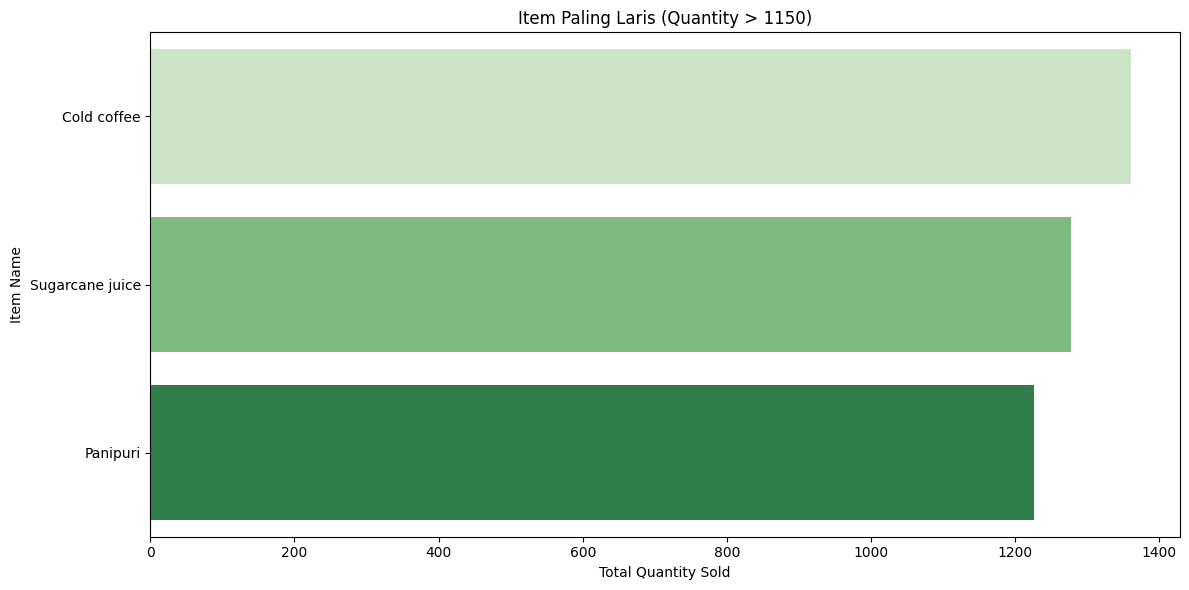

In [15]:
# Filter item yang laris
laris = Masalah_satu[Masalah_satu['total_quantity_sold'] > 1150]

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=laris.sort_values('total_quantity_sold', ascending=False), 
            x='total_quantity_sold', y='item_name', palette='Greens')
plt.title('Item Paling Laris (Quantity > 1150)')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Item Name')
plt.tight_layout()
plt.show()


C:\Users\damar\AppData\Local\Temp\ipykernel_11600\950847979.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=tidak_laris.sort_values('total_quantity_sold'),


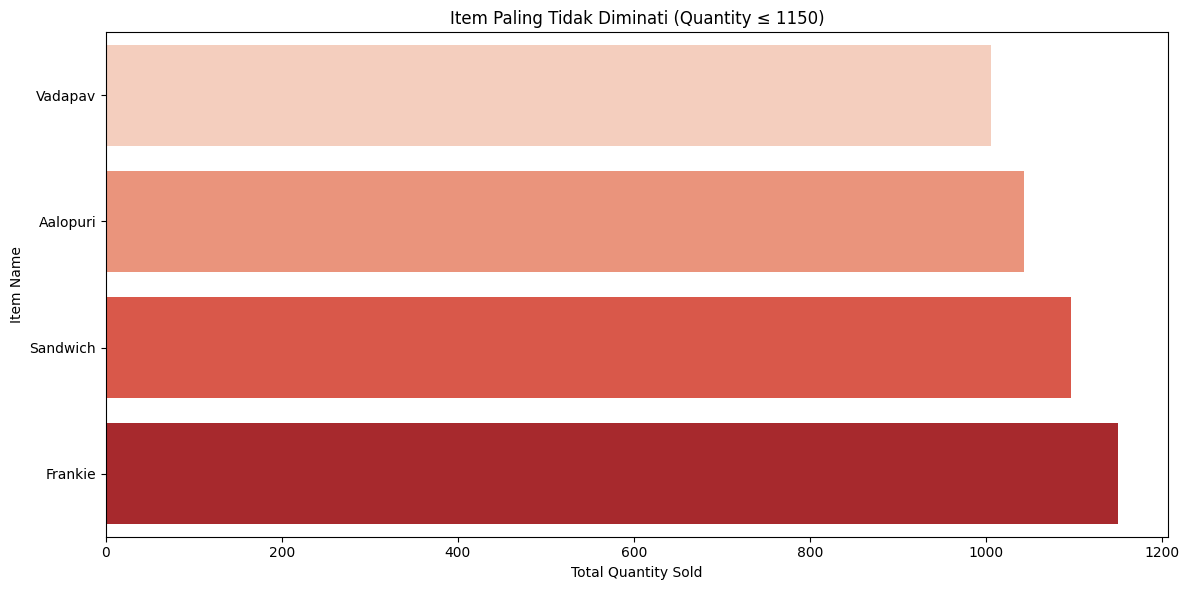

In [16]:
# Filter item yang tidak diminati
tidak_laris = Masalah_satu[Masalah_satu['total_quantity_sold'] <= 1150]

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=tidak_laris.sort_values('total_quantity_sold'), 
            x='total_quantity_sold', y='item_name', palette='Reds')
plt.title('Item Paling Tidak Diminati (Quantity ≤ 1150)')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Item Name')
plt.tight_layout()
plt.show()



C:\Users\damar\AppData\Local\Temp\ipykernel_11600\1145165216.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=tidak_laris_amount.sort_values('total_transaction_amount'),


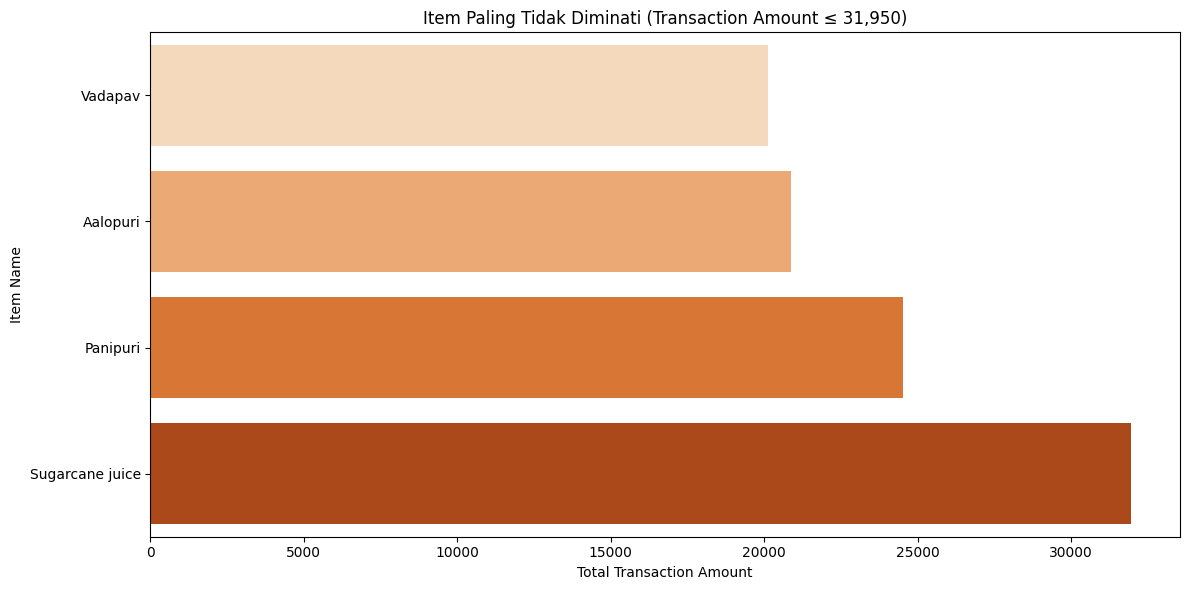

In [17]:

# Filter item yang tidak diminati berdasarkan nilai transaksi
tidak_laris_amount = Masalah_satu[Masalah_satu['total_transaction_amount'] <= 31950]

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=tidak_laris_amount.sort_values('total_transaction_amount'), 
            x='total_transaction_amount', y='item_name', palette='Oranges')
plt.title('Item Paling Tidak Diminati (Transaction Amount ≤ 31,950)')
plt.xlabel('Total Transaction Amount')
plt.ylabel('Item Name')
plt.tight_layout()
plt.show()


C:\Users\damar\AppData\Local\Temp\ipykernel_11600\1955202337.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=laris_amount.sort_values('total_transaction_amount', ascending=False),


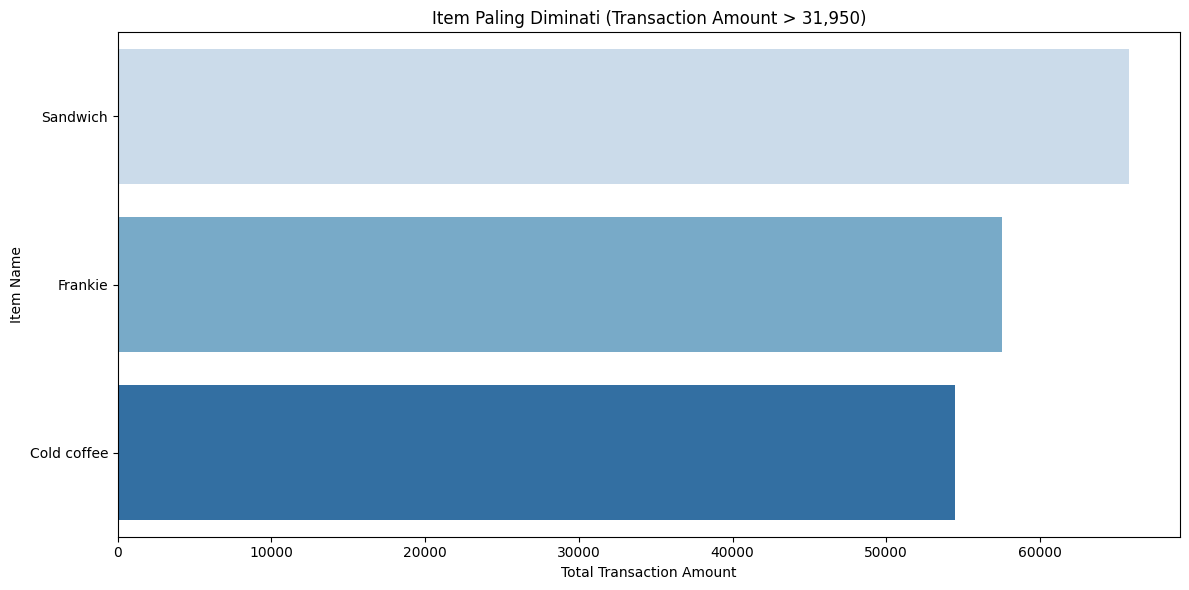

In [18]:
# Filter item yang diminati berdasarkan nilai transaksi
laris_amount = Masalah_satu[Masalah_satu['total_transaction_amount'] > 31950]

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=laris_amount.sort_values('total_transaction_amount', ascending=False), 
            x='total_transaction_amount', y='item_name', palette='Blues')
plt.title('Item Paling Diminati (Transaction Amount > 31,950)')
plt.xlabel('Total Transaction Amount')
plt.ylabel('Item Name')
plt.tight_layout()
plt.show()

### 2. 

In [19]:
# Tambahkan kolom hari dari tanggal
df['day_of_week'] = df['date'].dt.day_name()
Masalah_dua = df.groupby(['day_of_week', 'time_of_sale']).size().reset_index(name='total_transactions')

hari_urut = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
Masalah_dua['day_of_week'] = pd.Categorical(Masalah_dua['day_of_week'], categories=hari_urut, ordered=True)


time_urut = ['Morning', 'Afternoon', 'Evening', 'Night', 'Midnight']
Masalah_dua['time_of_sale'] = pd.Categorical(Masalah_dua['time_of_sale'], categories=time_urut, ordered=True)


Masalah_dua = Masalah_dua.sort_values(['day_of_week', 'day_of_week'])


```
buat nama column day_of_week dari dataframe df column date dan ambil nama daynya

urutkan day_of_week dan time_of_sale sesui urutan yang diberikan 

sort isi dari day_of_week day_of_week
```

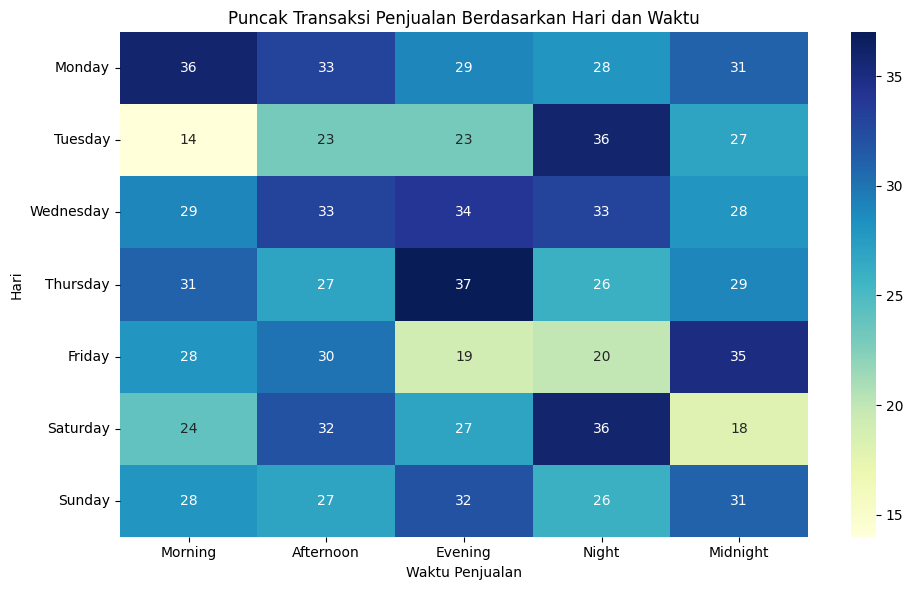

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ubah data menjadi pivot table agar cocok untuk heatmap
pivot_table = Masalah_dua.pivot(index='day_of_week', columns='time_of_sale', values='total_transactions')

# Buat heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Puncak Transaksi Penjualan Berdasarkan Hari dan Waktu')
plt.xlabel('Waktu Penjualan')
plt.ylabel('Hari')
plt.tight_layout()
plt.show()


### 3. 

In [21]:

Masalah_tiga = df[['date', 'order_id', 'transaction_amount']]
Masalah_tiga['Month'] = Masalah_tiga['date'].dt.to_period('M')

# 3. Hitung jumlah transaksi unik dan total pendapatan per bulan
Masalah_tiga = Masalah_tiga.groupby(by=['Month']).agg(
    total_transaksi=('order_id', 'nunique'),             
    total_pendapatan=('transaction_amount', 'sum')      
).reset_index()


C:\Users\damar\AppData\Local\Temp\ipykernel_11600\687763170.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Masalah_tiga['Month'] = Masalah_tiga['date'].dt.to_period('M')


```
Kode ini digunakan untuk menganalisis data penjualan bulanan. Pertama, data difokuskan hanya pada kolom tanggal, ID pesanan, dan jumlah transaksi. Lalu, dibuat kolom baru yang merepresentasikan bulan dari setiap tanggal transaksi. Selanjutnya, data dikelompokkan berdasarkan bulan untuk menghitung total transaksi unik dan total pendapatan di setiap bulan. Hasilnya adalah ringkasan performa penjualan per bulan dalam bentuk jumlah transaksi dan pendapatan.
```

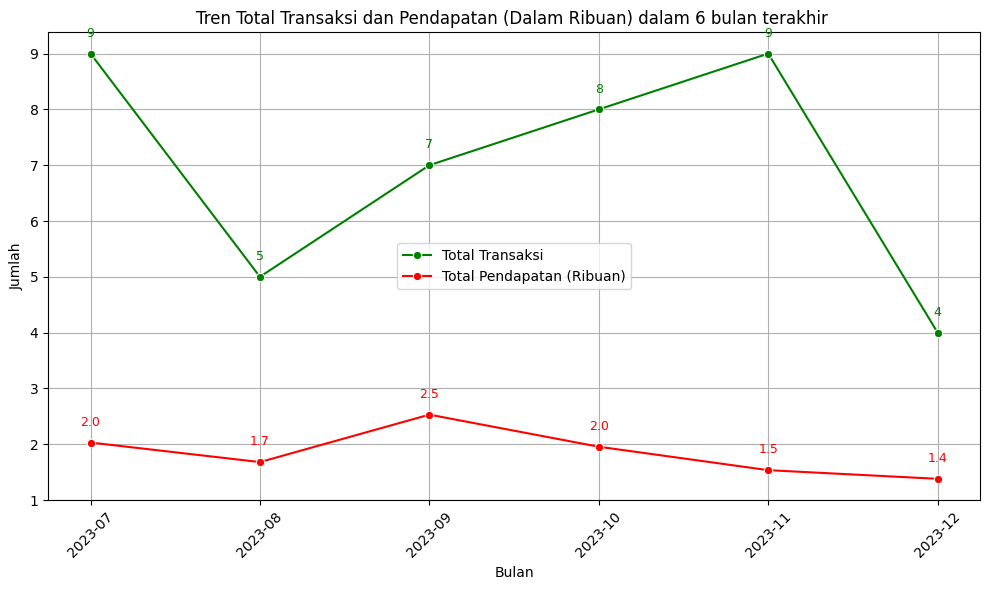

In [22]:
# Ambil data 6 bulan terakhir dan salin
data = Masalah_tiga.tail(6).copy()
data['Month'] = data['Month'].astype(str)
data['total_pendapatan_ribu'] = data['total_pendapatan'] / 1000

# Plot dasar
plt.figure(figsize=(10, 6))

# Plot line dan titik untuk total transaksi
sns.lineplot(data=data, x='Month', y='total_transaksi', marker='o', label='Total Transaksi', color='green')

# Tambahkan label titik total transaksi
for i in range(len(data)):
    plt.text(data['Month'].iloc[i], data['total_transaksi'].iloc[i] + 0.3,  # sedikit di atas titik
             str(data['total_transaksi'].iloc[i]), 
             color='green', ha='center', fontsize=9)

# Plot line dan titik untuk total pendapatan (ribuan)
sns.lineplot(data=data, x='Month', y='total_pendapatan_ribu', marker='o', label='Total Pendapatan (Ribuan)', color='red')

# Tambahkan label titik total pendapatan
for i in range(len(data)):
    plt.text(data['Month'].iloc[i], data['total_pendapatan_ribu'].iloc[i] + 0.3,
             f"{data['total_pendapatan_ribu'].iloc[i]:.1f}",  # tampilkan 1 desimal
             color='red', ha='center', fontsize=9)

# Format chart
plt.title('Tren Total Transaksi dan Pendapatan (Dalam Ribuan) dalam 6 bulan terakhir ')
plt.xlabel('Bulan')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

### 4

In [23]:
df['transaction_type'].unique()

array(['other', 'Cash', 'Online'], dtype=object)

```'
lihat data uniq dari kolom transaction_type untuk memulai analsyisi inferesial
```

In [24]:
# Extracting quantity data for each transaction type

cash_payment = df['quantity'][df['transaction_type'] == 'Cash']
online_payment = df['quantity'][df['transaction_type'] == 'Online']
other_payment = df['quantity'][df['transaction_type'] == 'other']

```
sorting isi dari transaction_type cash, online, other. yang kemudian dimasukkan ke masing masing variable
```

In [25]:
print(f'rata - rata  jumlah penjualan yang menggunakan cash: {cash_payment.mean():.2f}')
print(f'rata - rata  jumlah penjualan yang menggunakan Online: {online_payment.mean():.2f}')
print(f'rata - rata  jumlah penjualan oyang menggunakan other: {other_payment.mean():.2f}')

rata - rata  jumlah penjualan yang menggunakan cash: 8.28
rata - rata  jumlah penjualan yang menggunakan Online: 7.89
rata - rata  jumlah penjualan oyang menggunakan other: 8.67


```
H0 : Tidak ada perbedaan signifikan dari ketiga jenis transaksi terhadap jumlah penjualan
H1 : Ada perbedaan signifikan dari ketiga jenis transaksi terhadap jumlah penjualan
```

In [26]:
res = stats.f_oneway(cash_payment, online_payment, other_payment)
print('P-value:',res.pvalue)

P-value: 0.1868977145965993


p value > 0.5 maka H0 diterima
kesimpulannya, tidak ada Tidak ada perbedaan signifikan dari ketiga jenis transaksi terhadap jumlah penjualan

C:\Users\damar\AppData\Local\Temp\ipykernel_11600\2686342592.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='transaction_type', y='quantity', data=df_filtered, palette='pastel')


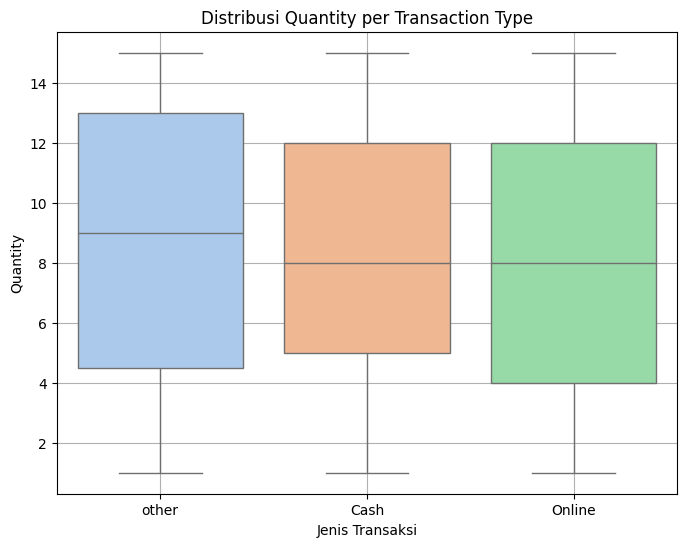

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Buat kolom baru untuk menyederhanakan data visualisasi
df_filtered = df[df['transaction_type'].isin(['Cash', 'Online', 'other'])]

plt.figure(figsize=(8, 6))
sns.boxplot(x='transaction_type', y='quantity', data=df_filtered, palette='pastel')
plt.title('Distribusi Quantity per Transaction Type')
plt.xlabel('Jenis Transaksi')
plt.ylabel('Quantity')
plt.grid(True)
plt.show()


### 5.
 

In [28]:

item_revenue = df.groupby('item_type')['transaction_amount'].sum().reset_index()
item_revenue = item_revenue.sort_values(by='transaction_amount', ascending=False)

item_revenue


,item_type,transaction_amount
1,Fastfood,188840
0,Beverages,86390


C:\Users\damar\AppData\Local\Temp\ipykernel_11600\1546775380.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=item_revenue, x='transaction_amount', y='item_type', palette='viridis')


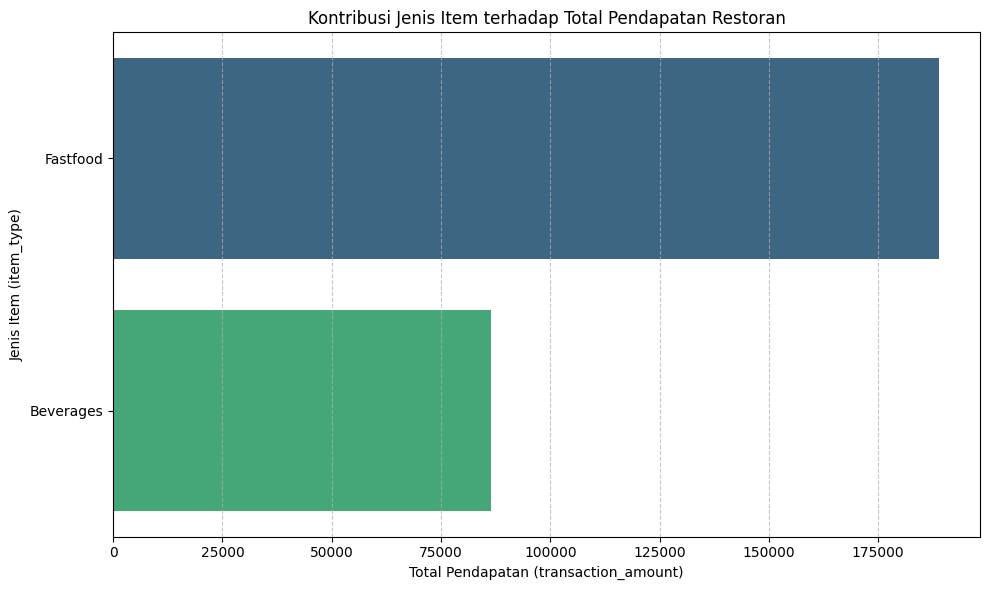

In [29]:
# Plot contribution of each item_type to total revenue
plt.figure(figsize=(10, 6))
sns.barplot(data=item_revenue, x='transaction_amount', y='item_type', palette='viridis')
plt.title('Kontribusi Jenis Item terhadap Total Pendapatan Restoran')
plt.xlabel('Total Pendapatan (transaction_amount)')
plt.ylabel('Jenis Item (item_type)')
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

### 6. 

In [30]:
# Lihat ringkasan data staf (received_by)
staff_summary = df.groupby('received_by')['transaction_amount'].agg(
    total_sales='sum',
    avg_sales='mean',
    transaction_count='count',
    std_dev_sales='std'
).sort_values(by='total_sales', ascending=False).reset_index()


staff_summary


,received_by,total_sales,avg_sales,transaction_count,std_dev_sales
0,Mr.,143440,280.156250,512,214.441830
1,Mrs.,131790,270.061475,488,193.396361


```
Kode ini digunakan untuk menganalisis kinerja staf berdasarkan transaksi yang mereka tangani. Data dikelompokkan berdasarkan nama staf (received_by), lalu dihitung total penjualan, rata-rata nilai transaksi, jumlah transaksi, dan standar deviasi dari nilai transaksi. Hasilnya kemudian diurutkan berdasarkan total penjualan dari yang tertinggi ke terendah, untuk melihat staf dengan kontribusi penjualan terbesar.
```

<Axes: xlabel='received_by', ylabel='total_sales'>

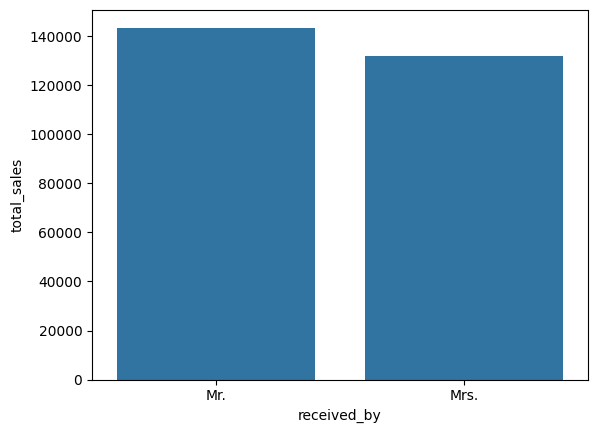

In [31]:
sns.barplot(x='received_by', y='total_sales', data=staff_summary)


# 6. Conclusion

```
Berdasarkan eksplorasi dan analisis data transaksi, ditemukan bahwa:

Produk dan Staf Terlaris
Produk tertentu secara konsisten menunjukkan volume penjualan yang tinggi, menandakan popularitas dan permintaan pasar yang kuat. Selain itu, beberapa staf menunjukkan kinerja yang unggul dalam menangani transaksi bernilai tinggi, terutama yang didominasi oleh satu jenis kelamin, yang dapat menjadi pertimbangan dalam penjadwalan atau pelatihan staf.

Waktu Penjualan Tertinggi
Transaksi cenderung memuncak pada waktu dan hari tertentu, yang mengindikasikan pola perilaku konsumen yang dapat dimanfaatkan untuk optimalisasi jam operasional dan promosi.

Jenis Transaksi dan Dampaknya
Transaksi promosi berkontribusi pada peningkatan volume penjualan, tetapi tidak selalu linier dengan pendapatan. Hal ini menunjukkan pentingnya menyeimbangkan strategi diskon dengan margin keuntungan.

Kinerja Barang terhadap Pendapatan
Tidak semua produk bervolume tinggi berkontribusi besar terhadap pendapatan. Oleh karena itu, fokuslah tidak hanya pada kuantitas yang terjual, tetapi juga pada total nilai transaksi per item.


Strategis untuk peningaktan penjualan

Fokus pada produk dengan margin tinggi untuk memaksimalkan keuntungan, bukan hanya volume.
Mengoptimalkan jadwal staf dan jam operasional berdasarkan pola waktu transaksi tertinggi.
Mengevaluasi efektivitas promo secara berkala untuk memastikan kontribusinya terhadap cashflow.
Melakukan pelatihan staf berdasarkan kinerja individu untuk meningkatkan pelayanan dan produktivitas.